<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h2 style="text-align:center; margin:40px"> Ensembles - Bagging </h2>

![](img/bagging.png)

<b>Bagging</b> (<b>B</b>ootstrap <b>agg</b>regating) é um tipo de algoritmo que realiza predições baseadas no resultado de <b>vários modelos</b>, sendo que cada modelo é treinado com uma <b>amostra aleatória com reposição</b> dos dados.

<b>Classificação:</b> Predição feita por votação entre as predições de cada modelo

<b>Regressão:</b> Predição é a média das predições de cada modelo

<br/>
Algumas vantagens de fazer bagging são:
<ul>
    <li>Maior <b>estabilidade</b> do modelo</li>
    <li>Possibilidade de <b>aumento de performance</b> (acurácia, precisão, etc...)</li>
    <li>Menor risco de <b>overfitting</b></li>
    <li>Cada modelo pode ser <b>treinado em paralelo</b></li>
</ul>

<h2 style="text-align:center; margin:40px"> Ensembles - Random Forests </h2>

![](img/randomforest.png)

<b>Random Forests</b> são um caso especial de Bagging onde cada modelo é uma <b>árvore de decisão</b>, e além de realizarmos amostragem nas linhas da base de dados, também realizamos <b>amostragem nas variáveis (colunas)</b> a cada quebra de cada árvore.

<b>Classificação:</b> Predição feita por votação entre as predições de cada árvore

<b>Regressão:</b> Predição é a média das predições de cada árvore

Random Forests possuem as mesmas vantagens de realizar Bagging, e costumam apresentar resultados interessantes em diversos cenários, sendo um bom candidato para se testar em muitos problemas.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [3]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\vinicius\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


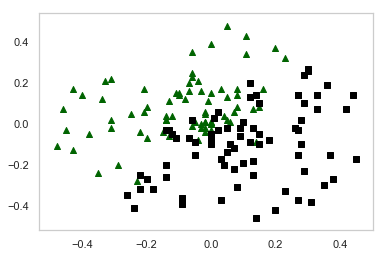

In [4]:
baseDados = pd.read_csv('data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [5]:
RF = RandomForestClassifier(criterion="entropy", max_depth=2, n_estimators=10)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
RF.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

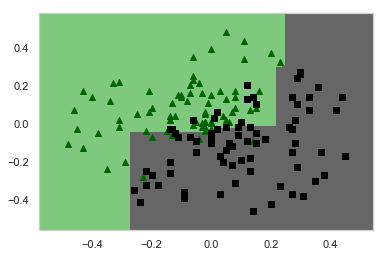

In [6]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = RF.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = RF.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Ensembles - Gradient Boosting </h2>

![](img/gradientboosting.png)

O <b> Gradient Boosting </b> combina vários modelos simples (em geral árvores pequenas ou regressores lineares) para obter modelos mais complexos e com melhor performance.

O primeiro modelo é treinado normalmente, <b>o segundo tenta acertar o erro do primeiro</b> e assim sucessivamente. No final a resposta é obtida pela combinação de todos os modelos, que varia se o problema for de classificação ou regressão.

<h3><font color="red">Atenção:</font> Como cada modelo tenta acertar o erro do anterior, existe uma dependência que inviabiliza a paralelização do treinamento. Por conta disto, o treinamento do Gradient Boosting costuma ser <font color="red">bem mais lento</font> que o de uma Random Forest</h3>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
GB = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=10)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
GB.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

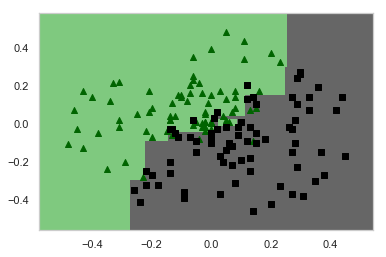

In [9]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = GB.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = GB.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')